## Exploratory Data Analysis

Loading all the data we have and merging it into one DataFrame for further analysis.

In [10]:
import pandas as pd

In [11]:
import pandas as pd
import os
from functools import reduce

def read_and_merge_all_data(data_dir="data/out/"):
    """
    Read all CSV files from data/out/ directory and merge them on YEAR and COUNTRYCODE
    """
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    print(csv_files)
    
    if not csv_files:
        print(f"No CSV files found in {data_dir}")
        return pd.DataFrame()
    
    dataframes = []
    
    for file in csv_files:
        file_path = os.path.join(data_dir, file)
        try:
            df = pd.read_csv(file_path)
            print(f"Loaded {file}: {df.shape}")
            
            # Check if the required columns exist
            if 'YEAR' in df.columns and 'COUNTRYCODE' in df.columns:
                dataframes.append(df)
            else:
                print(f"Warning: {file} doesn't have YEAR and COUNTRYCODE columns, skipping...")
                
        except Exception as e:
            print(f"Error reading {file}: {e}")
    
    if not dataframes:
        print("No valid dataframes to merge")
        return pd.DataFrame()
    
    # Merge all dataframes
    print("Merging all dataframes...")
    merged_df = reduce(lambda left, right: pd.merge(left, right, on=['YEAR', 'COUNTRYCODE'], how='outer'), dataframes)
    
    print(f"Final merged dataframe shape: {merged_df.shape}")
    return merged_df

# Use the function
SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

merged_df = read_and_merge_all_data()
merged_df

['all_clio_data.csv', 'all_clio_data_pt2.csv', 'nobel_laureates.csv', 'owd-armed-forces-personnel.csv', 'owd_armed_forces_percent_population.csv', 'owd_education_government_expenditure_gdp.csv', 'owd_education_tertiary_completion_rate.csv', 'owd_exported_goods_as_share_of_gdp.csv', 'owd_exported_goods_gdp_share.csv', 'owd_military-spending.csv', 'owd_military_spending_as_share_of_gdp.csv', 'wipo_patents.csv']
Loaded all_clio_data.csv: (98757, 42)
Loaded all_clio_data_pt2.csv: (41657, 16)
Loaded nobel_laureates.csv: (647, 3)
Loaded owd-armed-forces-personnel.csv: (5824, 3)
Loaded owd_armed_forces_percent_population.csv: (5602, 3)
Loaded owd_education_government_expenditure_gdp.csv: (5381, 3)
Loaded owd_education_tertiary_completion_rate.csv: (4311, 3)
Loaded owd_exported_goods_as_share_of_gdp.csv: (13808, 3)
Loaded owd_exported_goods_gdp_share.csv: (13101, 3)
Loaded owd_military-spending.csv: (15547, 3)
Loaded owd_military_spending_as_share_of_gdp.csv: (8366, 3)
Loaded wipo_patents.csv:

,COUNTRYCODE,YEAR,ARMEDCONFLICTSINTERNAL,ARMEDCONFLICTSINTERNATIONAL,AVERAGEYEARSOFEDUCATION,BOOKTITLESPERCAPITA,COMPETITIVENESSOFEXECUTIVERECRUITMENTXRCOMP,COMPETITIVENESSOFPARTICIPATIONSPARCOMP,COMPOSITEMEASUREOFWELLBEING,EXCHANGERATESTOUKPOUND,...,MILITARYPERSONNELPERCENT,ARMEDFORCESPERCOFPOP,EDUCATIONGDPSHARE,TERTIARYCOMPLETIONRATE,MERCHANDISEEXPORTSGDP,MERCHANDISEEXPORTGDPSHARE,MILITARYSPENDINGSHAREGDP,MILITARYSPENDINGGDP,PATENTSFILINGSOFFICE,PATENTSFILINGSORIGIN
0,AFG,1500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,1500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,1500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,1500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,1500,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104784,VNM,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.1,NaN,NaN,NaN,NaN,NaN,NaN
104785,YEM,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.7,NaN,NaN,NaN,NaN,NaN,NaN
104786,ZAF,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.5,NaN,NaN,NaN,NaN,NaN,NaN
104787,ZMB,2040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
SELECTED_COUNTRIES = ["USA", "GBR", "CHN"] #, "RUS", "CHN", "IND", "DEU", "FRA", "JPN", "CHE", "ARG"]

df_tertiary = pd.read_csv("data/out/owd_education_tertiary_completion_rate.csv")
df_gpd_edu = pd.read_csv("data/out/owd_education_government_expenditure_gdp.csv")
df_nobel = pd.read_csv("data/out/nobel_laureates.csv")
df_patents = pd.read_csv("data/out/wipo_patents.csv")
df_clio = pd.read_csv("data/out/all_clio_data.csv")


# df_clio = df_clio.loc[:, ~df_clio.columns.str.contains('^Unnamed')]

merged_df = pd.merge(df_tertiary, df_gpd_edu, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_nobel, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_patents, on=["YEAR", "COUNTRYCODE"], how="outer")
merged_df = pd.merge(merged_df, df_clio, on=["YEAR", "COUNTRYCODE"], how="outer")


# merged_df.fillna(0, inplace=True)
merged_df


# duplicates = merged_df.groupby(['YEAR', 'COUNTRYCODE']).size().reset_index(name='count')
# duplicates = duplicates[duplicates['count'] > 1]
# print(duplicates)

# merged_df[(merged_df['YEAR'] == 1884) & (merged_df['COUNTRYCODE'] == 'BEL')]



,COUNTRYCODE,YEAR,TERTIARYCOMPLETIONRATE,EDUCATIONGDPSHARE,NOBELLAUREATES,PATENTSFILINGSOFFICE,PATENTSFILINGSORIGIN,ARMEDCONFLICTSINTERNAL,ARMEDCONFLICTSINTERNATIONAL,AVERAGEYEARSOFEDUCATION,...,TOTALPASTURE,TOTALPOPULATION,UNIFIEDDEMOCRACYSCORESUDS,UNIVERSITIESFOUNDED,URBANIZATIONRATIO,WEALTHDECADALGINIS,WEALTHTOP10PERCENTSHARE,WEALTHTOTAL,WEALTHYEARLYGINIS,WORKINGWEEKINMANUFACTURING
0,AFG,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1483.890000,2000.0,NaN,NaN,0.0885,NaN,NaN,NaN,NaN,NaN
1,AGO,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,5145.686000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,313.676300,200.0,NaN,NaN,0.2450,NaN,NaN,NaN,NaN,NaN
3,AND,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,9.252063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,64.964580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,VNM,2040,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101419,YEM,2040,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101420,ZAF,2040,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101421,ZMB,2040,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


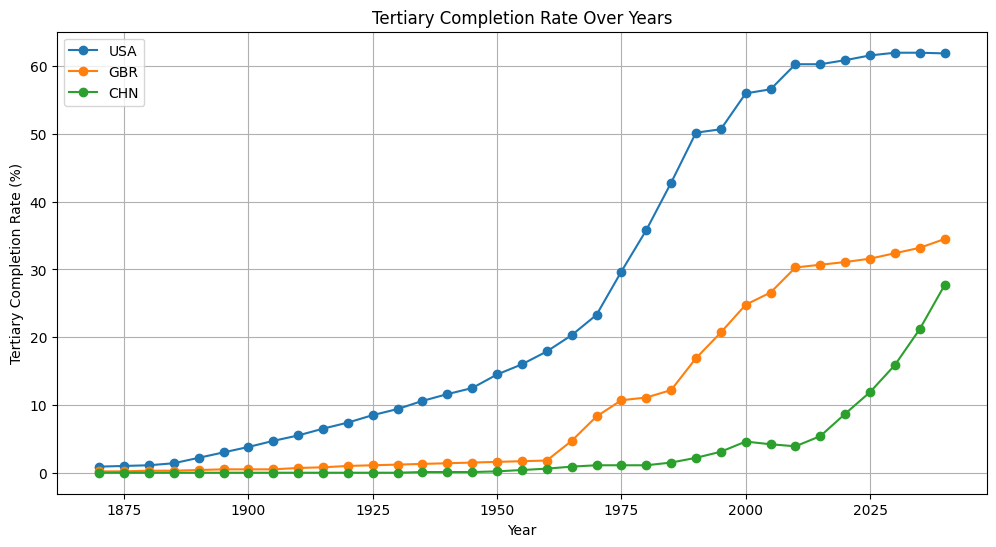

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in SELECTED_COUNTRIES:
    country_data = df_tertiary[df_tertiary['COUNTRYCODE'] == country]
    plt.plot(country_data['YEAR'], country_data['TERTIARYCOMPLETIONRATE'], label=country, marker='o')

plt.title('Tertiary Completion Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Tertiary Completion Rate (%)')
plt.legend()
plt.grid()
plt.show()


In [14]:
merged_df

,COUNTRYCODE,YEAR,TERTIARYCOMPLETIONRATE,EDUCATIONGDPSHARE,NOBELLAUREATES,PATENTSFILINGSOFFICE,PATENTSFILINGSORIGIN,ARMEDCONFLICTSINTERNAL,ARMEDCONFLICTSINTERNATIONAL,AVERAGEYEARSOFEDUCATION,...,TOTALPASTURE,TOTALPOPULATION,UNIFIEDDEMOCRACYSCORESUDS,UNIVERSITIESFOUNDED,URBANIZATIONRATIO,WEALTHDECADALGINIS,WEALTHTOP10PERCENTSHARE,WEALTHTOTAL,WEALTHYEARLYGINIS,WORKINGWEEKINMANUFACTURING
0,AFG,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1483.890000,2000.0,NaN,NaN,0.0885,NaN,NaN,NaN,NaN,NaN
1,AGO,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,5145.686000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,313.676300,200.0,NaN,NaN,0.2450,NaN,NaN,NaN,NaN,NaN
3,AND,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,9.252063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,1500,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,64.964580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101418,VNM,2040,19.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101419,YEM,2040,18.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101420,ZAF,2040,16.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101421,ZMB,2040,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


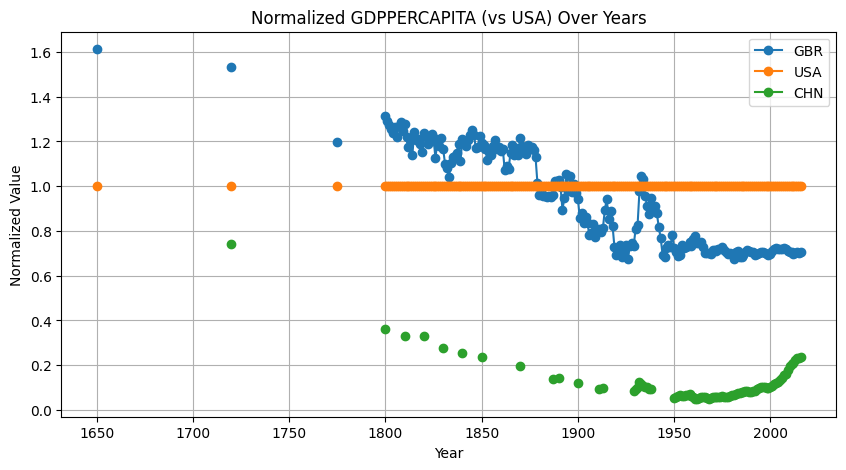

In [19]:
import matplotlib.pyplot as plt


def norm_value(df, country_code, col_to_norm):
    """
    Normalize the specified column for a given country against the USA's value for that year.
    """
    # DROP duplicates based on YEAR and COUNTRYCODE
    df = df.drop_duplicates(subset=["YEAR", "COUNTRYCODE", col_to_norm]).copy()

    df_country = (
        df[df["COUNTRYCODE"] == country_code].drop(columns=["COUNTRYCODE"]).copy()
    )
    df_country = df_country.rename(
        columns={col_to_norm: f"{col_to_norm}_{country_code}"}
    )

    df_temp = pd.merge(df, df_country, on="YEAR", how="left")
    df_temp[f"NORM_VALUE"] = (
        df_temp[col_to_norm] / df_temp[f"{col_to_norm}_{country_code}"]
    )
    out_df = df_temp.drop(columns=[f"{col_to_norm}_{country_code}"])

    return out_df


COL_NAME = "GDPPERCAPITA"
# COL_NAME = "TOTALPOPULATION"
BASE_COUNTRY = "USA"
df_test = norm_value(merged_df, country_code=BASE_COUNTRY, col_to_norm=COL_NAME)

plt.figure(figsize=(10, 5))
for country in ["GBR", "USA", "CHN"]:
    country_norm = df_test[df_test["COUNTRYCODE"] == country][["YEAR", "NORM_VALUE"]]
    plt.plot(
        country_norm["YEAR"], country_norm["NORM_VALUE"], label=country, marker="o"
    )

plt.title(f"Normalized {COL_NAME} (vs {BASE_COUNTRY}) Over Years")
plt.xlabel("Year")
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.show()
